In [220]:
import pandas as pd

In [221]:
students_score_1 = pd.read_csv("students_score_1.csv", encoding='gbk')
students_score_2 = pd.read_csv("students_score_2.csv", encoding='gbk')

In [222]:
students_score_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   姓名      40 non-null     object
 1   性别      40 non-null     object
 2   学号      40 non-null     int64 
 3   文学      40 non-null     int64 
 4   政治      40 non-null     int64 
 5   军事学     40 non-null     int64 
 6   管理学     40 non-null     int64 
 7   工程学     40 non-null     int64 
 8   哲学      40 non-null     int64 
 9   体育      40 non-null     int64 
 10  高等数学    40 non-null     int64 
 11  礼仪课     40 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 3.9+ KB


In [223]:
students_score_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   姓名        40 non-null     object 
 1   性别        40 non-null     object 
 2   学号        40 non-null     int64  
 3   大数据可视化    40 non-null     int64  
 4   计算机组成原理   35 non-null     float64
 5   推荐系统      40 non-null     int64  
 6   Python编程  40 non-null     int64  
 7   人工智能      40 non-null     int64  
 8   机器学习导论    40 non-null     int64  
 9   金融投资课程    35 non-null     float64
 10  演讲与口才课程   40 non-null     int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 3.6+ KB


In [224]:
students_score_1.head()

,姓名,性别,学号,文学,政治,军事学,管理学,工程学,哲学,体育,高等数学,礼仪课
0,关羽,男,1031,96,98,93,80,75,76,78,81,96
1,刘备,男,1032,93,97,92,78,74,78,80,77,95
2,韩信,男,1033,89,96,97,79,76,77,84,80,93
3,张良,男,1034,85,75,93,80,76,75,74,82,75
4,刘秀,男,1035,95,97,92,82,84,79,81,92,85


In [225]:
students_score_2.head()

,姓名,性别,学号,大数据可视化,计算机组成原理,推荐系统,Python编程,人工智能,机器学习导论,金融投资课程,演讲与口才课程
0,关羽,男,1031,65,58.0,62,78,70,68,58.0,72
1,刘备,男,1032,70,65.0,75,80,75,78,70.0,75
2,韩信,男,1033,68,60.0,70,82,72,70,55.0,68
3,张良,男,1034,58,NaN,68,75,65,60,NaN,65
4,刘秀,男,1035,75,72.0,80,85,80,82,65.0,70


### 将两张宽表转换为长表；

In [226]:
score_long1 = pd.melt(students_score_1, id_vars=['学号', '姓名', '性别'], value_vars=students_score_1.columns[3:]).rename(columns={'variable': '科目', 'value': '成绩'})
score_long1.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,文学,96
1,1032,刘备,男,文学,93
2,1033,韩信,男,文学,89
3,1034,张良,男,文学,85
4,1035,刘秀,男,文学,95


In [227]:
score_long2 = pd.melt(students_score_2, id_vars=['学号', '姓名', '性别'], value_vars=students_score_2.columns[3:]).rename(columns={'variable': '科目', 'value': '成绩'})
score_long2.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,大数据可视化,65.0
1,1032,刘备,男,大数据可视化,70.0
2,1033,韩信,男,大数据可视化,68.0
3,1034,张良,男,大数据可视化,58.0
4,1035,刘秀,男,大数据可视化,75.0


### 将两张长表合并；

In [228]:
score_stack = pd.concat([score_long1, score_long2], axis=0, ignore_index=True)
score_stack_all = score_stack.copy()
print(f"score_long1形状：{score_long1.shape}")
print(f"score_long2形状：{score_long2.shape}")
print(f"score_stack形状：{score_stack.shape}")

score_long1形状：(360, 5)
score_long2形状：(320, 5)
score_stack形状：(680, 5)


In [229]:
score_stack.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,文学,96.0
1,1032,刘备,男,文学,93.0
2,1033,韩信,男,文学,89.0
3,1034,张良,男,文学,85.0
4,1035,刘秀,男,文学,95.0


### 对各科目数据分别进行归一化，使各科目最高分为1，最低分为0，写出归一化公式；
#### x' = (x - min(x)) / (max(x) - min(X))

In [230]:
score_normalized = None
for course, group in score_stack.groupby('科目'):
    group['成绩'] = (group['成绩'] - group['成绩'].min()) / (group['成绩'].max() - group['成绩'].min())
    # 叠加成绩
    score_normalized = pd.concat([score_normalized, group], axis=0, ignore_index=True)

In [231]:
score_normalized.head()

,学号,姓名,性别,科目,成绩
0,1031,关羽,男,Python编程,0.565217
1,1032,刘备,男,Python编程,0.652174
2,1033,韩信,男,Python编程,0.739130
3,1034,张良,男,Python编程,0.434783
4,1035,刘秀,男,Python编程,0.869565


In [232]:
score_normalized.min()

学号        1031
姓名          关羽
性别           女
科目    Python编程
成绩         0.0
dtype: object

In [233]:
score_normalized.max()

学号    2013
姓名      鲁班
性别       男
科目    高等数学
成绩     1.0
dtype: object

### 利用Pandas自身可视化API和计算分析API完成下列任务；

### 算出平均成绩最好的3名同学和他们的成绩，要求不能有缺考和挂科；

In [234]:
# 删除挂科的同学
score_stack = score_stack[score_stack['成绩'] >= 60]
# 转为宽表
score_wide = score_stack.pivot_table(index=['学号', '姓名', '性别'], columns='科目', values='成绩').reset_index()
# 删除有Nan的同学
score_wide = score_wide.dropna()
score_wide['平均成绩'] = score_wide.iloc[:, 3:].mean(axis=1)    # 计算平均成绩
score_wide_sorted = score_wide.sort_values(by='平均成绩', ascending=False)  # 按平均成绩排序
score_wide_sorted.head(3)

科目,学号,姓名,性别,Python编程,人工智能,体育,军事学,哲学,大数据可视化,工程学,...,政治,文学,机器学习导论,演讲与口才课程,礼仪课,管理学,计算机组成原理,金融投资课程,高等数学,平均成绩
26,1057,慈禧,女,88.0,85.0,87.0,97.0,79.0,80.0,85.0,...,99.0,95.0,85.0,92.0,96.0,90.0,82.0,80.0,93.0,87.823529
8,1039,赵匡胤,男,88.0,85.0,85.0,97.0,79.0,80.0,90.0,...,99.0,97.0,85.0,80.0,88.0,88.0,78.0,75.0,93.0,86.411765
21,1052,吕雉,女,85.0,80.0,83.0,93.0,75.0,78.0,80.0,...,98.0,93.0,75.0,95.0,98.0,82.0,80.0,75.0,84.0,84.058824


In [235]:
# 取出前三名的前三列和最后一列
score_wide_sorted.iloc[:3, [0, 1, 2, 3, 4, 5, -1]]

科目,学号,姓名,性别,Python编程,人工智能,体育,平均成绩
26,1057,慈禧,女,88.0,85.0,87.0,87.823529
8,1039,赵匡胤,男,88.0,85.0,85.0,86.411765
21,1052,吕雉,女,85.0,80.0,83.0,84.058824


### 画出各科目成绩分布的箱型图；

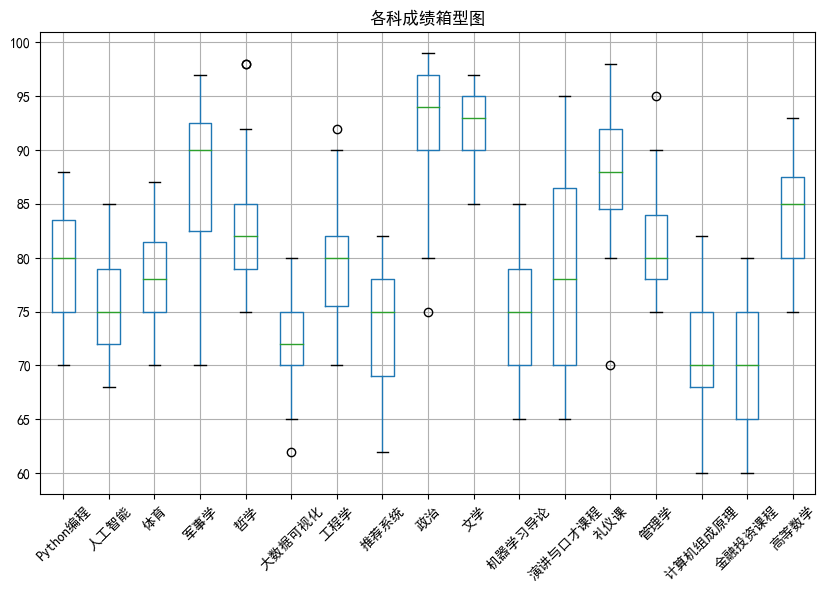

In [236]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置字体为SimHei显示中文
rcParams['font.sans-serif'] = 'SimHei'
# 设置图形大小
plt.figure(figsize=(10, 6))

score_wide[score_wide.columns[3:-1]].boxplot()  # 绘制箱型图
plt.title('各科成绩箱型图')
plt.xticks(rotation=45)  # 设置x轴标签旋转角度
plt.show()

### 画出所有成绩分布的直方图；

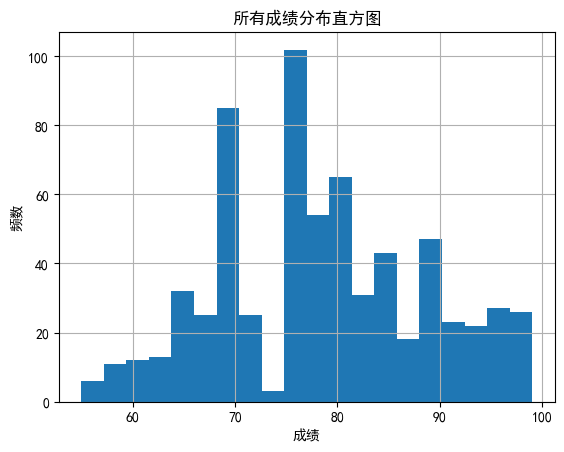

In [237]:
# 画出所有成绩分布的直方图
score_stack_all['成绩'].hist(bins=20)
plt.title('所有成绩分布直方图')
plt.xlabel('成绩')
plt.ylabel('频数')
plt.show()

### 基于分析选出各课程的课代表人选；

In [238]:
# 求每一科成绩最高的学生
for course, group in score_stack_all.groupby('科目'):
    print(course)
    print(group[group['成绩'] == group['成绩'].max()], end='\n\n')

Python编程
       学号   姓名 性别        科目    成绩
488  1039  赵匡胤  男  Python编程  88.0
506  1057   慈禧  女  Python编程  88.0

人工智能
       学号   姓名 性别    科目    成绩
528  1039  赵匡胤  男  人工智能  85.0
546  1057   慈禧  女  人工智能  85.0

体育
       学号  姓名 性别  科目    成绩
269  2003  李白  男  体育  95.0

军事学
       学号  姓名 性别   科目    成绩
112  2006  孙武  男  军事学  98.0

哲学
       学号   姓名 性别  科目    成绩
233  2007  王阳明  男  哲学  98.0
236  2010   朱熹  男  哲学  98.0

大数据可视化
       学号   姓名 性别      科目    成绩
368  1039  赵匡胤  男  大数据可视化  80.0
374  1045  李清照  女  大数据可视化  80.0
386  1057   慈禧  女  大数据可视化  80.0

工程学
       学号  姓名 性别   科目    成绩
191  2005  鲁班  男  工程学  95.0

推荐系统
       学号   姓名 性别    科目    成绩
448  1039  赵匡胤  男  推荐系统  82.0

政治
      学号   姓名 性别  科目    成绩
48  1039  赵匡胤  男  政治  99.0
56  1047  朱元璋  男  政治  99.0
66  1057   慈禧  女  政治  99.0

文学
      学号  姓名 性别  科目    成绩
27  2001  孔子  男  文学  98.0

机器学习导论
       学号   姓名 性别      科目    成绩
568  1039  赵匡胤  男  机器学习导论  85.0
586  1057   慈禧  女  机器学习导论  85.0

演讲与口才课程
       学号   姓名 性别       科目    成绩
661  1052

### 结合归一化之前的数据，用统计和可视化方法分析出最容易考的3门课，和最不容易考的3们课。

In [239]:
mean_df = score_stack_all.groupby('科目')['成绩'].agg(['mean']).sort_values(by='mean', ascending=False)

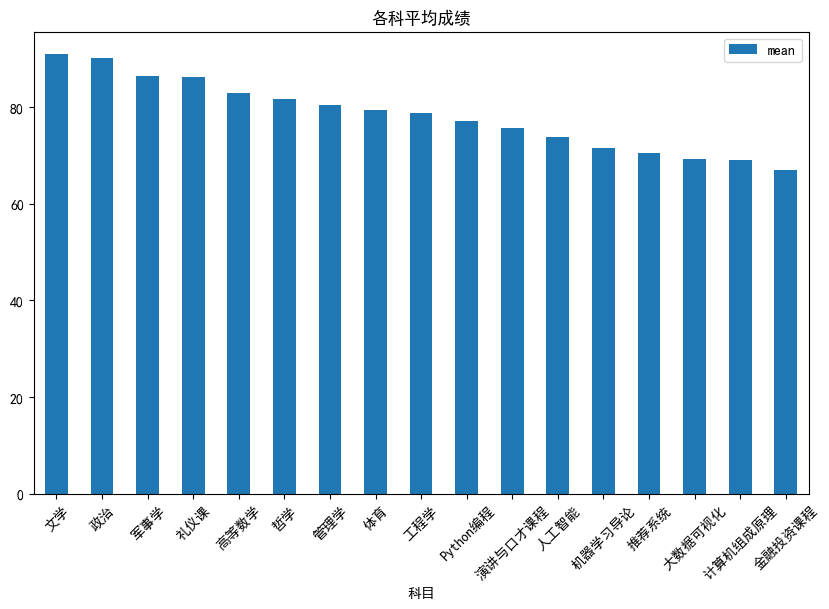

In [242]:
mean_df.plot(kind='bar', figsize=(10, 6))
plt.title('各科平均成绩')
plt.xticks(rotation=45)
plt.show()

In [241]:
mean_df.head(3), mean_df.tail(3)

(       mean
 科目         
 文学   91.075
 政治   90.200
 军事学  86.400,
               mean
 科目                
 大数据可视化   69.175000
 计算机组成原理  69.000000
 金融投资课程   67.028571)